Here are the steps I followed:

**Data Cleaning:**

Checked for duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the dataset with a specified encoding
data = pd.read_csv('mentalhealth.csv', encoding='latin1')

In [ ]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
data.shape

(101, 11)

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
#Checking the column names
col = data.columns

print(col)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


In [ ]:
#Checking the amount of unique values for each column
data[col].nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [ ]:
#Identify duplicate rows
duplicates = data.duplicated()

#Counting the number of duplicates, if any
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data.rename(columns={
    'Choose your gender': 'Gender',
    'Age': 'Age',
    'What is your course?': 'Course',
    'Your current year of Study': 'Year_of_Study',
    'What is your CGPA?': 'CGPA',
    'Marital status': 'Marital_Status',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'Panic_Attack',
    'Did you seek any specialist for a treatment?': 'Specialist_Treatment'
}, inplace=True)

In [ ]:
#Checking for missing data (NaN values) in the Dataframe
missing_data = data.isnull().sum()

In [ ]:
#Display the missing data counts for each column
print("Missing Data Counts:")
print(missing_data)

Missing Data Counts:
Gender                  0
Age                     1
Course                  0
Year_of_Study           0
CGPA                    0
Marital_Status          0
Depression              0
Anxiety                 0
Panic_Attack            0
Specialist_Treatment    0
dtype: int64


In [ ]:
median_age = data.Age.median()
data['Age'].fillna(median_age, inplace=True)
data.isna().sum()


Gender                  0
Age                     0
Course                  0
Year_of_Study           0
CGPA                    0
Marital_Status          0
Depression              0
Anxiety                 0
Panic_Attack            0
Specialist_Treatment    0
dtype: int64

In [ ]:
#Extracting the numeric part of the 'CGPA' column
data['CGPA'] = data['CGPA'].str.replace(' - ', '-')

#Splitting the CGPA values using the hyphen and take the average
data['CGPA'] = data['CGPA'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2)

#Converting the 'CGPA' column to a float
data['CGPA'] = data['CGPA'].astype(float)

In [ ]:
data['Specialist_Treatment'] = data['Specialist_Treatment'].map({'No': 0, 'Yes': 1})

In [ ]:
# Encode 'No' and 'Yes' to 0 and 1 for the target variable

data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
data['Anxiety'] = data['Anxiety'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
data['Panic_Attack'] = data['Panic_Attack'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)


In [ ]:
# Usings get_dummies function to perform one-hot encoding for 'Gender' column
#X_train = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
#X_test = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)

# Exploratory Data Analysis

In [ ]:
data.describe()

,Age,CGPA,Depression,Anxiety,Panic_Attack,Specialist_Treatment
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,20.514851,3.356287,0.346535,0.336634,0.326733,0.059406
std,2.488429,0.585152,0.478239,0.474915,0.471358,0.237562
min,18.000000,0.995000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,3.245000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,3.245000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,3.750000,1.000000,1.000000,1.000000,0.000000
max,24.000000,3.750000,1.000000,1.000000,1.000000,1.000000


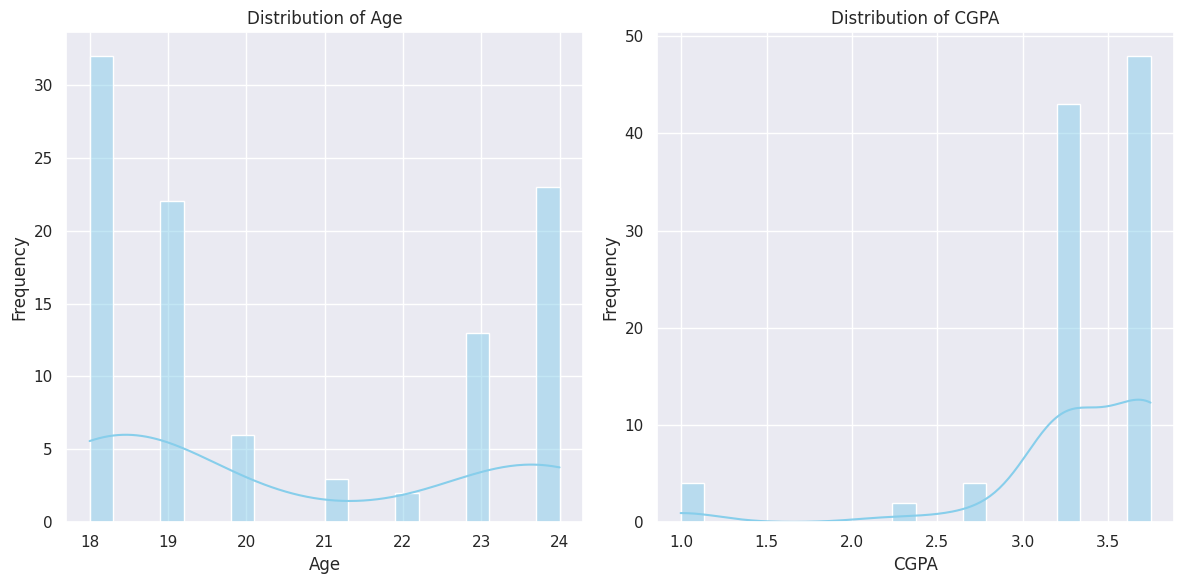

In [ ]:
numerical_features = ['Age', 'CGPA']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create histograms for each numerical feature
for feature in numerical_features:
    plt.subplot(1, 2, numerical_features.index(feature) + 1)
    sns.histplot(data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

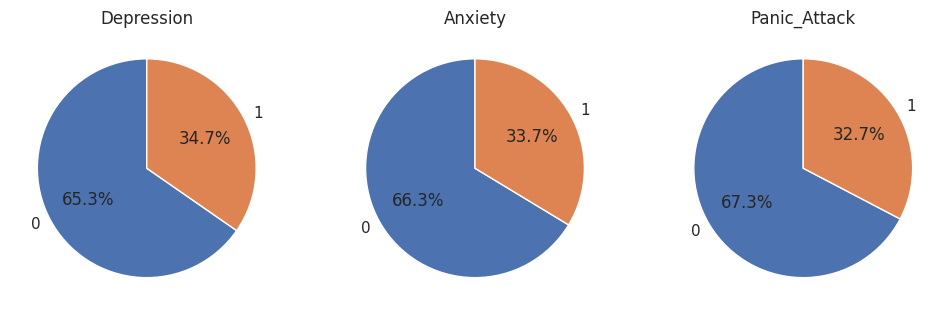

In [ ]:
#Visualizing the proportion of "Yes" and "No" responses for Depression, Anxiety and Panic_Attack
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, variable in enumerate(["Depression", "Anxiety", "Panic_Attack"]):
    data[variable].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set(ylabel='', title=variable)

plt.show()


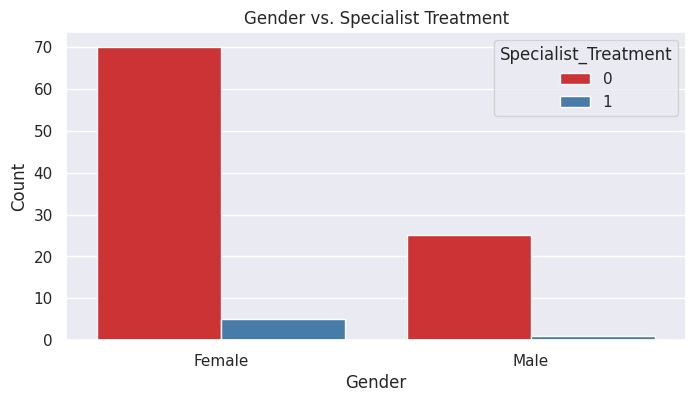

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))

sns.countplot(data=data, x="Gender", hue="Specialist_Treatment", palette="Set1")
plt.title("Gender vs. Specialist Treatment")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

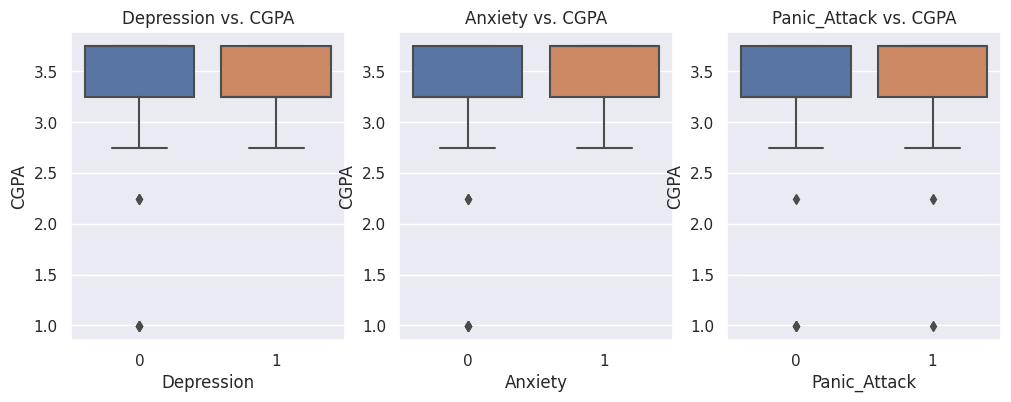

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.boxplot(data=data, x="Depression", y="CGPA")
plt.title("Depression vs. CGPA")

plt.subplot(132)
sns.boxplot(data=data, x="Anxiety", y="CGPA")
plt.title("Anxiety vs. CGPA")

plt.subplot(133)
sns.boxplot(data=data, x="Panic_Attack", y="CGPA")
plt.title("Panic_Attack vs. CGPA")

plt.show()

<Axes: >

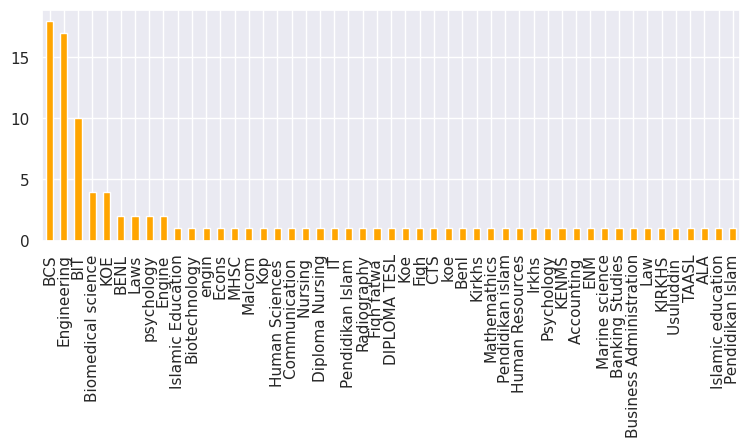

In [ ]:
data['Course'].value_counts().plot(kind='bar', color='orange', figsize=(9,3))

<ipython-input-245-bf78e421465b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


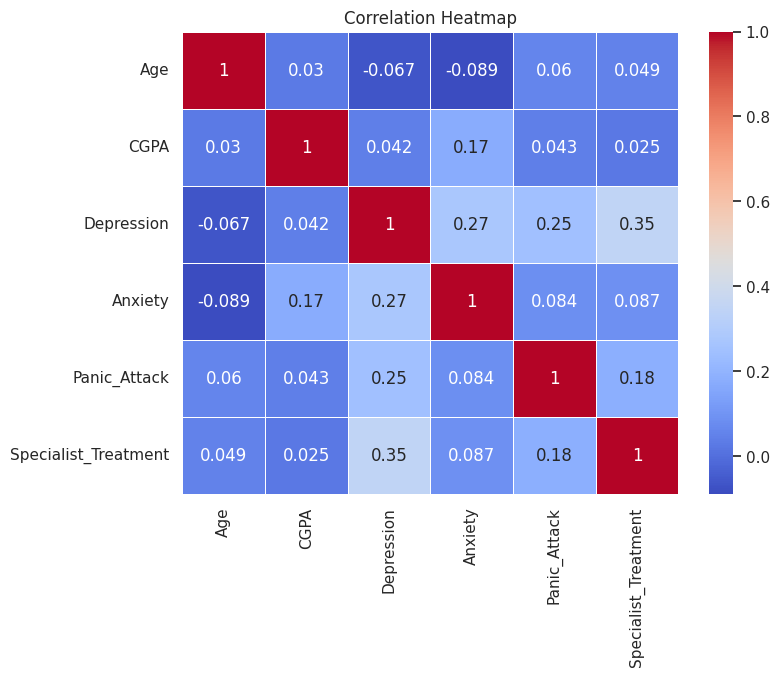

In [ ]:
# Correlation heatmap for numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## **Binary Classification Model:**

In [ ]:
#Preprocessing the data and splitting it into features and target variable
X = data[['Depression', 'Anxiety', 'Panic_Attack']]
y_depression = data ['Age']

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_depression, test_size=0.2, random_state=42)

In [ ]:
#Fit a Logistic Regression to predict Depression and Anxiety
model_depression = LogisticRegression()
model_depression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict depression on the test set
y_pred = model_age.predict(X_test)

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.638277558546694
R-squared: -0.027471241040947003


## **Regression Model:**

In [ ]:
# Preprocess data and split into features and target variable
X = data[['Depression', 'Anxiety', 'Panic_Attack']]
y_age = data['Age']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_age, test_size=0.2, random_state=42)

In [ ]:
# Creating a Linear Regression model
model_age = LinearRegression()

In [ ]:
# Train the model
model_age.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict age
y_pred_age = model_age.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_age)
mse = mean_squared_error(y_test, y_pred_age)
r2 = r2_score(y_test, y_pred_age)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 2.26526175186876
Mean Squared Error (MSE): 6.386582984898223
R-squared (R2): -0.048787807328638744
